In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.fft import fft, ifft, fftfreq

In [2]:
NUM_PORTS = 4
SIZE = 200
imp0 = 377
connect = 50
tau = 0.7
kappa = 0.5 # not working yet for complex numnber

maxTime = 400

ez1_tab = np.zeros([maxTime, SIZE])
ez2_tab = np.zeros([maxTime, SIZE])
ez3_tab = np.zeros([maxTime, SIZE])
ez4_tab = np.zeros([maxTime, SIZE])

In [3]:
def gaussian(qTime):
    return np.exp(-(qTime - 30.) * (qTime - 30.) / 100.) /imp0

In [4]:
class segment:
    def __init__(self, SIZE):
        self.ez = np.zeros([SIZE])
        self.hy = np.zeros([SIZE])
        self.sx = 49
        
    def hy_update(self):
        self.hy[SIZE-1] = self.hy[SIZE-2] # simple ABC for hy
        for j in range(SIZE-1):
            self.hy[j] = self.hy[j] + (self.ez[j+1] - self.ez[j]) / imp0;
            
    def ez_update(self):
        for j in range(1,SIZE):
            self.ez[j] = self.ez[j] + (self.hy[j] - self.hy[j-1]) * imp0;
        self.ez[0] = self.ez[1]  # simple ABC for ez

    def hy_sources(self, s, sx):
        self.sx = sx
        self.hy[self.sx] -= s /imp0 
        
    def ez_sources(self, s,sx):   
        self.sx = sx
        self.ez[self.sx] += s      

In [5]:
f1 = segment(SIZE)
f2 = segment(SIZE)
f3 = segment(SIZE)
f4 = segment(SIZE)

for qTime in range(maxTime):
    s = gaussian(qTime)
    
    f1.hy_update()
    f1.hy_sources(s,50)
    f1.ez_update()
    f1.ez_sources(s,50)

    s_new = tau*f1.ez[-1]
    f2.hy_update()
    f2.hy_sources(s_new,2)
    f2.ez_update()
    f2.ez_sources(s_new,2)

    s_new = 0*f1.ez[-1]
    f3.hy_update()
    f3.hy_sources(s_new,1)
    f3.ez_update()
    f3.ez_sources(s_new,1)
    
    s_new = kappa*f1.ez[-1]
    f4.hy_update()
    f4.hy_sources(s_new,2)
    f4.ez_update()
    f4.ez_sources(s_new,2)
    
    ez1_tab[qTime,:] = f1.ez[:]   
    ez2_tab[qTime,:] = f2.ez[:]   
    ez3_tab[qTime,:] = f3.ez[:]   
    ez4_tab[qTime,:] = f4.ez[:]   

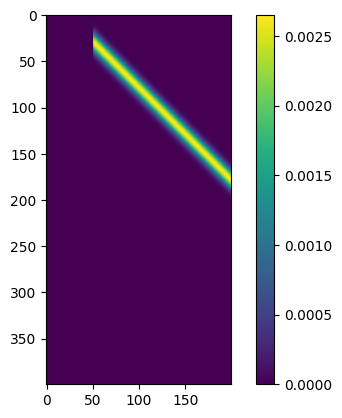

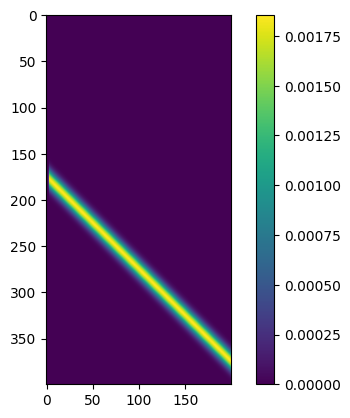

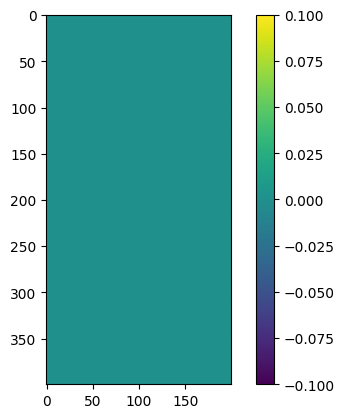

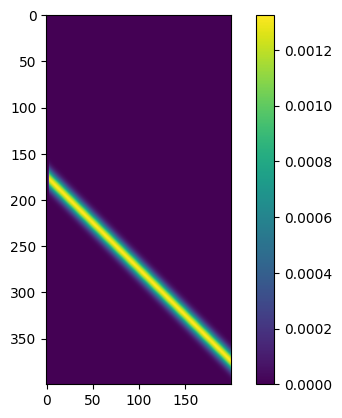

In [6]:
plt.imshow(ez1_tab)
plt.colorbar()
plt.show()
plt.imshow(ez2_tab)
plt.colorbar()
plt.show()
plt.imshow(ez3_tab)
plt.colorbar()
plt.show()
plt.imshow(ez4_tab)
plt.colorbar()
plt.show()
# plt.plot(ez_tab[:,15])